In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [44]:
np.random.seed(0)

In [45]:
dogs_wiskers_length = np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)

In [46]:
cats_wiskers_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)


In [47]:
# Comnbine data
dogs_data = np.vstack((dogs_wiskers_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_wiskers_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [48]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [49]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351],
       [4.89678115, 8.3130677 ],
       [4.02272212, 8.33367433]])

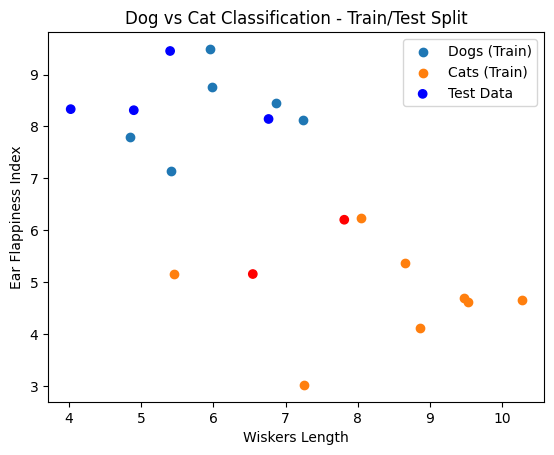

In [50]:
# plot the training and testing data
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], label='Dogs (Train)')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label='Cats (Train)')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label='Test Data')
plt.xlabel('Wiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Train/Test Split')
plt.legend()
plt.show()

In [53]:
 #Implement random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
#d is the number of features
 best_error= float('inf')
 best_theta=None
 best_theta0=None

 for i in range(k):
  theta = np.random.normal(size=d)
  theta0 = np.random.normal()

  error = computer_error(data_dogs,data_cats,theta,theta0)

  if error < best_error:
     best_error = error
     best_theta = theta
     best_theta0 = theta0

 return best_theta, best_theta0 ,best_error

def computer_error(data_dogs,data_cats,theta,theta0):
  error = 0

  for x in data_dogs:
     if np.dot(theta,x) + theta0 <= 0:
        error += 1

  for x in data_cats:
     if np.dot(theta,x) + theta0 > 0:
        error += 1

  return error



In [90]:
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(
                X_train_fold[y_train_fold == 0],
                X_train_fold[y_train_fold == 1],
                k, d
            )

            errors.append(
                computer_error(
                    X_val_fold[y_val_fold == 0],
                    X_val_fold[y_val_fold == 1],
                    best_theta_fold,
                    best_theta0_fold
                )
            )

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

k_values = [1,10, 50, 100, 200,350]
best_k = cross_validate(dogs_data, cats_data, k_values, d=2, n_splits=5)

print(f"Best k value from cross-validation: {best_k}")


Best k value from cross-validation: 200


In [91]:
# Run random linear classifier algorithm on training data
k=best_k
d=2
best_theta_train, best_theta0_train,train_error = random_linear_classifier(X_train[y_train==0],X_train[y_train==1],k,d)

In [92]:
X_val_train = np.linspace(2,10,100)
Y_val_train = (-best_theta_train[0]/best_theta_train[1])*X_val_train - (best_theta0_train/best_theta_train[1])

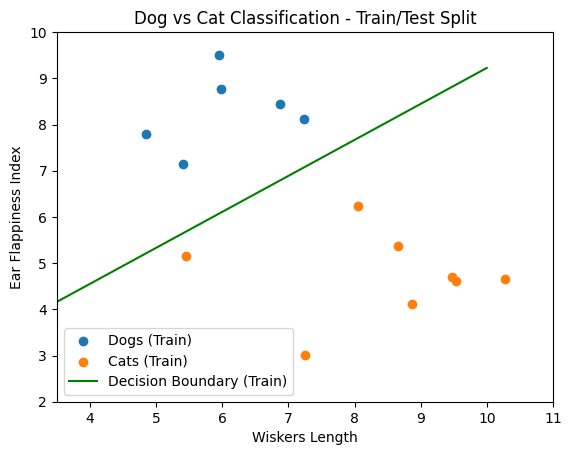

In [93]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], label='Dogs (Train)')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label='Cats (Train)')
plt.plot(X_val_train,Y_val_train,c='g',label='Decision Boundary (Train)')
plt.xlim(3.5,11)
plt.ylim(2,10)
plt.xlabel('Wiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Train/Test Split')
plt.legend()
plt.show()

In [79]:
print(f"Training Error: {train_error} out of {len(X_train)}")

Training Error: 0 out of 14


In [80]:
#compute testing error
test_error= computer_error(X_test[y_test==0],X_test[y_test==1],best_theta_train,best_theta0_train)
print(f"Testing Error: {test_error} out of {len(X_test)}")

Testing Error: 0 out of 6


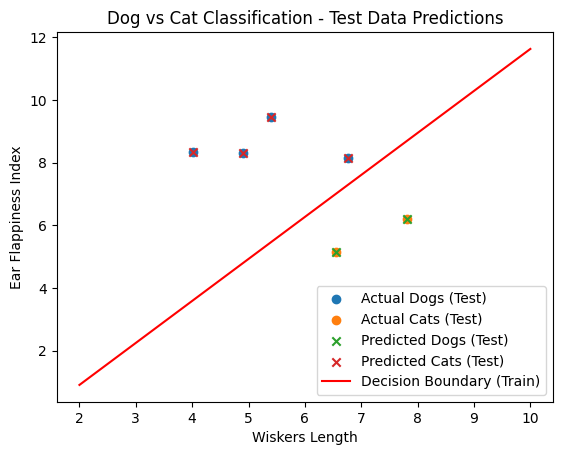

In [81]:
#plot the actual test data and predicted test data

plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Actual Dogs (Test)')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Actual Cats (Test)')


#predict test data points using the decision boundary obtained from training data
predicted_labels = np.zeros_like(y_test)
for i, x in enumerate(X_test):
    if np.dot(best_theta_train, x) + best_theta0_train > 0:
        predicted_labels[i] = 1


# plot predicted tets data points
plt.scatter(X_test[predicted_labels==0][:,0], X_test[predicted_labels==0][:,1], marker='x', label='Predicted Dogs (Test)')
plt.scatter(X_test[predicted_labels==1][:,0], X_test[predicted_labels==1][:,1], marker='x', label='Predicted Cats (Test)')


# plot decision boundary
plt.plot(X_val_train,Y_val_train,c='red',label='Decision Boundary (Train)')

plt.xlabel('Wiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Test Data Predictions')
plt.legend()
plt.show()
